In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [91]:
data= pd.read_csv("/Users/Jade/Desktop/newData2.csv")
data.head()

,Unnamed: 0,Unnamed: 0.1,ID,Birth Year,Gender Flag,Skillset1 Weight,Skillset2 Weight,City of profile,Country of profile,Education,...,s2-Product Management,s2-Public Policy,s2-Real Estate,s2-Retail and Fashion,s2-Sales,s2-Social Media and Communications,s2-Software Engineering,s2-Video and Film Production,s2-Web Design,s2-Web Development
0,0,0,d5dc4adf-7444-38c2-84d7-10dcaa5cba78,2001,2,0.868526,0.085376,San Francisco,United States,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,d5dc4adf-7444-38c2-84d7-10dcaa5cba78,2001,2,0.868526,0.085376,San Francisco,United States,0,...,0,0,0,0,0,0,0,0,0,0
2,6,8,3b31713b-a554-333f-ae6b-823ab4eaa360,1980,1,0.329413,0.180861,Albany,United States,5,...,0,0,0,0,0,0,0,0,0,0
3,7,9,3b31713b-a554-333f-ae6b-823ab4eaa360,1980,1,0.329413,0.180861,Albany,United States,5,...,0,0,0,0,0,0,0,0,0,0
4,8,10,3b31713b-a554-333f-ae6b-823ab4eaa360,1980,1,0.329413,0.180861,Albany,United States,5,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#data['Gender Flag'] = data['Gender Flag'].replace({0: 'unknown', 1: 'female', 2: 'male'})
#data['Education'] = data['Education'].replace({0: 'unknown', 1: 'High School', 2: 'Vocational degree', 3: 'Associates', 
#                                               4: 'Bachelors', 5:'Masters', 6: 'MBA', 7: 'PhD'})
#data['Length'] = data['Length']*1/30
# Categorize length in 1:'0-6 months', 2:'6-12 months', 3:'12-18 months', 4:'18-24 months', 5:'more than 2 years'
#data['Length']=pd.cut(data['Length'], bins=[0, 6, 12, 18,24,1000000], 
#                                             include_lowest=True, 
#                                             labels=['<6mo','6-12mo','12-18mo','12-24mo','>24mo'])

# Convert Birthyear to Age in 1:'> 45 yrs old', 2:'36-45 yrs old', 3:'26-35 yrs old', 4:'< 26 yrs old'
#data['Age']=pd.cut(data['Age'], bins=[0, 25, 35, 45, 100000], 
#                                             include_lowest=True, 
#                                             labels=['>45 yrs old','36-45 yrs old','26-35 yrs old','<26 yrs old'])



In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63985 entries, 0 to 63984
Data columns (total 87 columns):
Unnamed: 0                                 63985 non-null int64
Unnamed: 0.1                               63985 non-null int64
ID                                         63985 non-null object
Birth Year                                 63985 non-null int64
Gender Flag                                63985 non-null int64
Skillset1 Weight                           63985 non-null float64
Skillset2 Weight                           63985 non-null float64
City of profile                            58061 non-null object
Country of profile                         63985 non-null object
Education                                  63985 non-null int64
Elite Institution                          63985 non-null int64
Start Date                                 63985 non-null object
End Date                                   63985 non-null object
Length                                     63985 n

In [93]:
data = data.drop(['Unnamed: 0','Unnamed: 0.1'],axis = 1)

In [94]:
data['Industry'].unique()

array(['Tech', 'Finance', 'Consumer', 'Healthcare', 'Transportation'],
      dtype=object)

In [8]:
# split dataset according to Industry
dataTech = data[data['Industry']=='Tech']
print('The shape of tech data: ',dataTech.shape)
dataFin = data[data['Industry']=='Finance']
print('The shape of finance data: ',dataFin.shape)
dataCon = data[data['Industry']=='Consumer']
print('The shape of consumer data: ',dataCon.shape)
dataHealth = data[data['Industry']=='Healthcare']
print('The shape of healthcare data: ',dataHealth.shape)
dataTrans = data[data['Industry']=='Transportation']
print('The shape of transportation data: ',dataTrans.shape)

The shape of tech data:  (30400, 85)
The shape of finance data:  (6918, 85)
The shape of consumer data:  (14033, 85)
The shape of healthcare data:  (11694, 85)
The shape of transportation data:  (940, 85)


In [9]:
data['Gender Flag']

0        2
1        2
2        1
3        1
4        1
5        2
6        2
7        2
8        0
9        0
10       2
11       2
12       0
13       0
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       0
27       0
28       0
29       0
        ..
63955    2
63956    2
63957    0
63958    0
63959    1
63960    1
63961    1
63962    1
63963    2
63964    2
63965    1
63966    2
63967    2
63968    2
63969    2
63970    2
63971    2
63972    0
63973    2
63974    2
63975    2
63976    2
63977    2
63978    2
63979    2
63980    2
63981    2
63982    2
63983    2
63984    0
Name: Gender Flag, Length: 63985, dtype: int64

In [9]:
type(dataTech['Gender Flag'][0])

numpy.int64

Text(0.5,1,'Transportation')

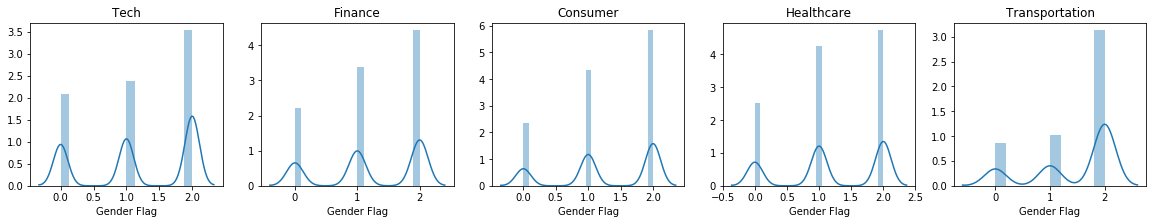

In [10]:
# distribution of gender
fig, axs = plt.subplots(ncols=5,figsize=(20,3))
sns.distplot(dataTech['Gender Flag'], ax=axs[0]).set_title('Tech')
sns.distplot(dataFin['Gender Flag'], ax=axs[1]).set_title('Finance')
sns.distplot(dataCon['Gender Flag'], ax=axs[2]).set_title('Consumer')
sns.distplot(dataHealth['Gender Flag'], ax=axs[3]).set_title('Healthcare')
sns.distplot(dataTrans['Gender Flag'], ax=axs[4]).set_title('Transportation')

Text(0.5,1,'Transportation')

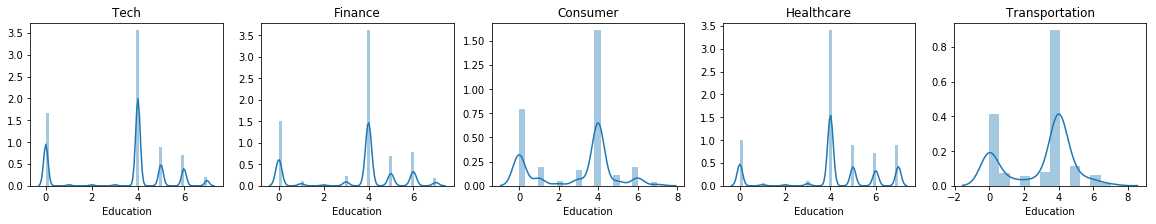

In [11]:
# distribution of education
fig, axs = plt.subplots(ncols=5,figsize=(20,3))
sns.distplot(dataTech['Education'], ax=axs[0]).set_title('Tech')
sns.distplot(dataFin['Education'], ax=axs[1]).set_title('Finance')
sns.distplot(dataCon['Education'], ax=axs[2]).set_title('Consumer')
sns.distplot(dataHealth['Education'], ax=axs[3]).set_title('Healthcare')
sns.distplot(dataTrans['Education'], ax=axs[4]).set_title('Transportation')

Text(0.5,1,'Transportation')

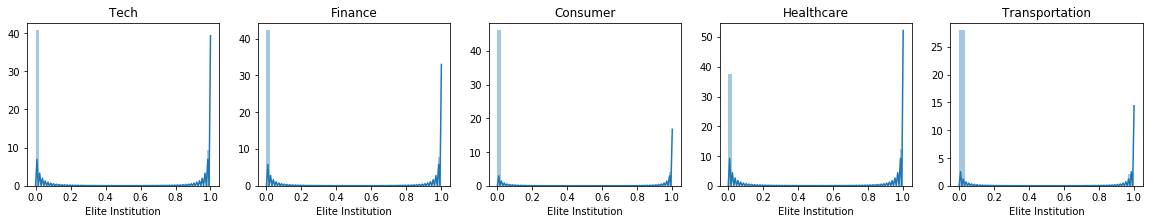

In [12]:
# distribution of Elite institution
fig, axs = plt.subplots(ncols=5,figsize=(20,3))
sns.distplot(dataTech['Elite Institution'], ax=axs[0]).set_title('Tech')
sns.distplot(dataFin['Elite Institution'], ax=axs[1]).set_title('Finance')
sns.distplot(dataCon['Elite Institution'], ax=axs[2]).set_title('Consumer')
sns.distplot(dataHealth['Elite Institution'], ax=axs[3]).set_title('Healthcare')
sns.distplot(dataTrans['Elite Institution'], ax=axs[4]).set_title('Transportation')

Text(0.5,1,'Transportation')

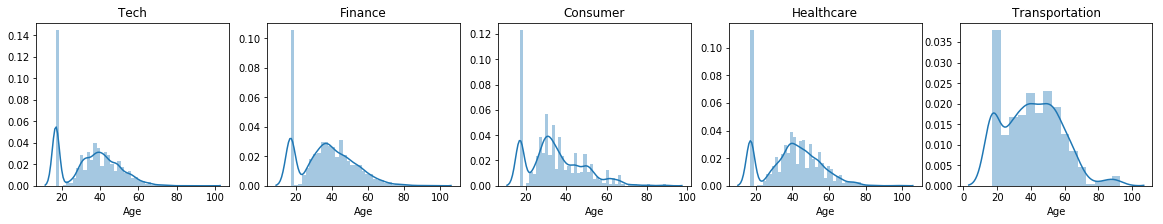

In [13]:
# distribution of age
fig, axs = plt.subplots(ncols=5,figsize=(20,3))
sns.distplot(dataTech['Age'], ax=axs[0]).set_title('Tech')
sns.distplot(dataFin['Age'], ax=axs[1]).set_title('Finance')
sns.distplot(dataCon['Age'], ax=axs[2]).set_title('Consumer')
sns.distplot(dataHealth['Age'], ax=axs[3]).set_title('Healthcare')
sns.distplot(dataTrans['Age'], ax=axs[4]).set_title('Transportation')

In [14]:
# check if the dataset is balanced
print("number of laidoff people in tech:",len(dataTech[dataTech['laid_off']==1]))
print("number of non-laidoff people in tech:",len(dataTech[dataTech['laid_off']==0]))
print("number of laidoff people in finance:",len(dataFin[dataFin['laid_off']==1]))
print("number of non-laidoff people in finance:",len(dataFin[dataFin['laid_off']==0]))
print("number of laidoff people in consumer:",len(dataCon[dataCon['laid_off']==1]))
print("number of non-laidoff people in consumer:",len(dataCon[dataCon['laid_off']==0]))
print("number of laidoff people in healthcare:",len(dataHealth[dataHealth['laid_off']==1]))
print("number of non-laidoff people in healthcare:",len(dataHealth[dataHealth['laid_off']==0]))
print("number of laidoff people in transportation:",len(dataTrans[dataTrans['laid_off']==1]))
print("number of non-laidoff people in transportation:",len(dataTrans[dataTrans['laid_off']==0]))


number of laidoff people in tech: 2510
number of non-laidoff people in tech: 27890
number of laidoff people in finance: 378
number of non-laidoff people in finance: 6540
number of laidoff people in consumer: 1147
number of non-laidoff people in consumer: 12886
number of laidoff people in healthcare: 328
number of non-laidoff people in healthcare: 11366
number of laidoff people in transportation: 46
number of non-laidoff people in transportation: 894


In [15]:
type(data['Skillset1 Weight'][0])

numpy.float64

## Tech

In [15]:
# make balanced data
not_laid_off_tech = dataTech[dataTech['laid_off'] == 0]
laid_off_tech = dataTech[dataTech['laid_off'] == 1]
np.random.seed(101)
not_laid_off_tech = not_laid_off_tech.sample(n=7500) 
dataTech = pd.concat([not_laid_off_tech, laid_off_tech])

In [16]:
print(len(dataTech[dataTech['laid_off']==1]))
print(len(dataTech[dataTech['laid_off']==0]))

2510
7500


In [17]:
from sklearn.model_selection import train_test_split
# Reserve 20% for testing
y = dataTech['laid_off']
X = dataTech.drop(['Length', 'ID','Birth Year','City of profile', 'Country of profile',
                   'Start Date','End Date','Role', 'Dept', 'Company Name',
                   'Location','Industry','laid_off','Layoff Date', 'Employees Affected'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=101)

print('training data has %d observation with %d features'% X_train.shape)
print('test data has %d observation with %d features'% X_test.shape)

training data has 8008 observation with 70 features
test data has 2002 observation with 70 features


In [18]:
# Scale the data, using standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# Random forest to see feature importance
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
RF.score(X_test,y_test)

/Users/Jade/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.8426573426573427

In [20]:
# hypermarameter tuning for Random Forest
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators' : [40,60,80]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [40, 60, 80]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [21]:
# best number of trees
def print_grid_search_metrics(gs):
    print ("Best score: %0.3f" % gs.best_score_)
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

print_grid_search_metrics(Grid_RF)

Best score: 0.840
Best parameters set:
	n_estimators: 60


In [22]:
# feature importance
importances = RF.feature_importances_
# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), X.columns), reverse=True):
    print (v + ": " + str(k))

Feature importance ranking by Random Forest Model:
Skillset2 Weight: 0.1983
Skillset1 Weight: 0.1964
Age: 0.1553
Education: 0.0618
Gender Flag: 0.046
Elite Institution: 0.0242
s1-Electrical Engineering: 0.0169
s2-Product Management: 0.0132
s1-Sales: 0.013
s2-Sales: 0.0128
s1-Software Engineering: 0.0121
s2-Administration: 0.0118
s2-IT Management and Support: 0.0113
s2-Software Engineering: 0.0112
s2-Business Development: 0.0099
s2-Web Development: 0.0097
s1-Finance: 0.0094
s1-Product Management: 0.0088
s1-Web Development: 0.0085
s1-Administration: 0.0084
s2-Social Media and Communications: 0.0082
s1-Digital Marketing: 0.0081
s2-Human Resources: 0.0077
s1-Web Design: 0.0076
s1-IT Management and Support: 0.0071
s2-Digital Marketing: 0.0068
s1-Human Resources: 0.0068
s2-Web Design: 0.0066
s2-Data Analysis: 0.0063
s2-Finance: 0.0062
s2-Operations Management: 0.006
s2-Electrical Engineering: 0.0058
s2-Mobile Telecommunications: 0.0055
s1-Social Media and Communications: 0.0045
s1-Business D

###  for tech industry, Age > Education> Gender Flag> Elite Institution

In [23]:
# Lasso regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR.score(X_test, y_test)

0.7522477522477522

In [24]:
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(1, 5, 10)
}
Grid_LR = GridSearchCV(LogisticRegression(),parameters, cv=5)
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ('l1', 'l2'), 'C': (1, 5, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [25]:
print_grid_search_metrics(Grid_LR)

Best score: 0.755
Best parameters set:
	C: 1
	penalty: 'l1'


In [26]:
best_LR_model = Grid_LR.best_estimator_

In [27]:
scaler = StandardScaler()
X_l1 = scaler.fit_transform(X)
best_LR_model.fit(X_l1, y)
best_LR_model.coef_[0]
print ("Logistic Regression (L1) Coefficients")
for k,v in sorted(zip(map(lambda x: round(x, 4), best_LR_model.coef_[0]), \
                      X.columns), key=lambda k_v:(-abs(k_v[0]),k_v[1])):
    print (v + ": " + str(k))

Logistic Regression (L1) Coefficients
s1-Electrical Engineering: 0.2335
Age: -0.1856
s1-Sales: -0.183
Skillset1 Weight: -0.1693
Education: 0.1417
s1-Software Engineering: 0.1191
s1-Product Management: -0.1115
Skillset2 Weight: -0.1031
s1-Web Development: 0.1007
s2-Military: -0.0907
s2-Retail and Fashion: 0.0758
s2-Energy, Oil, and Gas: -0.0747
s1-Mobile Telecommunications: 0.0743
s2-Non-Profit and Community: 0.0742
s1-Legal: 0.0737
s1-Operations Management: -0.0721
s2-Data Analysis: 0.0688
s1-Real Estate: -0.0676
s2-Hospitality: -0.0635
s2-Product Management: -0.0598
s2-Web Development: 0.0537
s2-Electrical Engineering: 0.0508
s1-Web Design: 0.0476
s2-Manufacturing and Process Management: 0.0466
s2-Software Engineering: 0.0449
s2-Digital Marketing: -0.0428
s1-Data Analysis: 0.0407
s1-Non-Profit and Community: -0.0397
s1-Administration: 0.0382
s1-Manufacturing and Process Management: 0.037
s1-Hospitality: 0.0363
Elite Institution: -0.036
s2-Human Resources: 0.0356
s2-Video and Film Prod

In [28]:
best_LR_model.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
y_pred = best_LR_model.predict_proba(X_test)
best_LR_model.score(X_test, y_test)

0.7517482517482518

In [30]:
from sklearn.metrics import classification_report
y_true = y_test 
y_pred = best_LR_model.predict(X_test)
target_names = ['non-laid_off', 'laid_off']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

non-laid_off       0.76      0.98      0.86      1500
    laid_off       0.54      0.07      0.13       502

 avg / total       0.70      0.75      0.67      2002



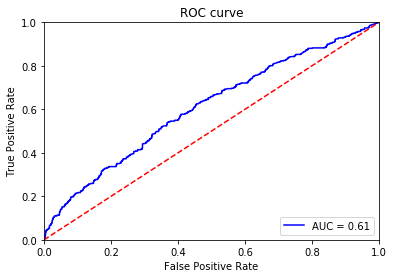

In [31]:
from sklearn.metrics import roc_curve,auc
prob = best_LR_model.predict_proba(X_test)
pred = prob[:,1]
fpr, tpr, threshold = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)

plt.title("ROC curve")
plt.plot(fpr,tpr,'b',label= 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [32]:
# naive bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb.score(X_test,y_test)

0.7322677322677322

In [36]:
nb.fit(X_l1, y)
nb.coef_[0]
print ("Logistic Regression (L1) Coefficients")
for k,v in sorted(zip(map(lambda x: round(x, 4), nb.coef_[0]), \
                      X.columns), key=lambda k_v:(-abs(k_v[0]),k_v[1])):
    print (v + ": " + str(k))

AttributeError: 'GaussianNB' object has no attribute 'coef_'

## Consumers

In [47]:
not_laid_off_con = dataCon[dataCon['laid_off'] == 0]
laid_off_con = dataCon[dataCon['laid_off'] == 1]
np.random.seed(101)
not_laid_off_con = not_laid_off_con.sample(n=5000) 
dataCon = pd.concat([not_laid_off_con, laid_off_con])

In [48]:
print(len(dataCon[dataCon['laid_off']==1]))
print(len(dataCon[dataCon['laid_off']==0]))

1147
5000


In [49]:
from sklearn import model_selection
# Reserve 20% for testing
y1 = dataCon['laid_off']
X1 = dataCon.drop(['Length', 'ID','Birth Year','City of profile', 'Country of profile',
                   'Start Date','End Date','Role', 'Dept', 'Company Name',
                   'Location','Industry','laid_off','Layoff Date'],axis = 1)
X1_train, X1_test, y1_train, y1_test = model_selection.train_test_split(X1, y1, test_size=0.2,random_state=101)

print('training data has %d observation with %d features'% X1_train.shape)
print('test data has %d observation with %d features'% X1_test.shape)

training data has 4917 observation with 71 features
test data has 1230 observation with 71 features


In [50]:
# Scale the data, using standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)

In [51]:
# Random forest to see feature importance
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X1_train, y1_train)
RF.score(X1_test,y1_test)

0.9121951219512195

In [52]:
# hypermarameter tuning for Random Forest
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators' : [40,60,80]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X1_train, y1_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [40, 60, 80]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [53]:
# best number of trees
def print_grid_search_metrics(gs):
    print ("Best score: %0.3f" % gs.best_score_)
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

print_grid_search_metrics(Grid_RF)

Best score: 0.904
Best parameters set:
	n_estimators: 60


In [54]:
# feature importance
importances = RF.feature_importances_
# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), X.columns), reverse=True):
    print (v + ": " + str(k))

Feature importance ranking by Random Forest Model:
Skillset2 Weight: 0.1565
Skillset1 Weight: 0.1413
Age: 0.1287
s1-Administration: 0.1175
Education: 0.0536
Gender Flag: 0.0491
s2-Business Development: 0.0188
s1-Business Development: 0.016
s2-IT Management and Support: 0.0158
s1-Data Analysis: 0.014
s1-Sales: 0.0133
s1-IT Management and Support: 0.0131
s2-Sales: 0.0118
Elite Institution: 0.0111
s2-Data Analysis: 0.0104
s2-Design: 0.0098
s2-Software Engineering: 0.0084
s2-Social Media and Communications: 0.0075
s2-Video and Film Production: 0.0074
s1-Manufacturing and Process Management: 0.0074
s1-Product Management: 0.0072
s1-Electrical Engineering: 0.0068
s2-Public Policy: 0.0066
s1-Digital Marketing: 0.0066
s2-Healthcare: 0.0065
s1-Software Engineering: 0.0063
s1-Video and Film Production: 0.0061
s1-Public Policy: 0.0061
s2-Administration: 0.006
s2-Manufacturing and Process Management: 0.0059
s2-Electrical Engineering: 0.0059
s1-Social Media and Communications: 0.0059
s1-Hospitality:

### For Consumer Products industry, Age > s1-Administration >Education> Gender

In [56]:
# Lasso regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X1_train, y1_train)
LR.score(X1_test, y1_test)

0.8414634146341463

In [57]:
# hyperparameter tuning
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(1, 5, 10)
}
Grid_LR = GridSearchCV(LogisticRegression(),parameters, cv=5)
Grid_LR.fit(X1_train, y1_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ('l1', 'l2'), 'C': (1, 5, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [58]:
print_grid_search_metrics(Grid_LR)

Best score: 0.810
Best parameters set:
	C: 1
	penalty: 'l1'


In [59]:
best_LR_model.fit(X1_train, y1_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [60]:
scaler = StandardScaler()
X_l2 = scaler.fit_transform(X1)
best_LR_model.fit(X_l2, y1)
best_LR_model.coef_[0]
print ("Logistic Regression (L1) Coefficients")
for k,v in sorted(zip(map(lambda x: round(x, 4), best_LR_model.coef_[0]), \
                      X.columns), key=lambda k_v:(-abs(k_v[0]),k_v[1])):
    print (v + ": " + str(k))

Logistic Regression (L1) Coefficients
s1-Administration: -0.2973
s1-Product Management: 0.215
s1-Industrial Management: -0.1824
s1-Business Development: 0.1557
Education: 0.1375
s2-Logistics: 0.1311
s1-Electrical Engineering: 0.1292
s2-Military: -0.1271
Gender Flag: -0.1214
Skillset2 Weight: 0.1159
s1-Energy, Oil, and Gas: 0.1159
s2-Business Development: 0.108
s2-Energy, Oil, and Gas: 0.106
s2-Operations Management: -0.1048
s1-Public Policy: 0.1035
s2-Data Analysis: -0.1024
s2-Industrial Management: -0.1016
s1-Video and Film Production: 0.0987
s1-Healthcare: -0.0986
s2-Retail and Fashion: -0.0976
s2-Hospitality: 0.0934
s2-Healthcare: 0.0923
s2-Manufacturing and Process Management: 0.087
s2-Software Engineering: -0.0846
s1-Web Development: -0.0808
s1-Design: 0.0778
s2-Administration: -0.0706
s1-Finance: 0.067
s1-Legal: -0.0609
s2-Social Media and Communications: -0.0603
s1-Web Design: -0.0594
s2-Product Management: -0.0578
Skillset1 Weight: -0.0556
s2-Video and Film Production: 0.0556
E

In [61]:
y_pred = best_LR_model.predict_proba(X1_test)
best_LR_model.score(X1_test, y1_test)

0.8390243902439024

In [62]:
from sklearn.metrics import classification_report
y1_true = y1_test 
y1_pred = best_LR_model.predict(X1_test)
target_names = ['non-laid_off', 'laid_off']
print(classification_report(y1_true, y1_pred, target_names=target_names))

              precision    recall  f1-score   support

non-laid_off       0.85      0.98      0.91      1028
    laid_off       0.56      0.10      0.17       202

 avg / total       0.80      0.84      0.79      1230



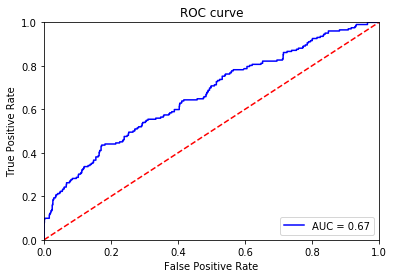

In [63]:
from sklearn.metrics import roc_curve,auc
prob = best_LR_model.predict_proba(X1_test)
pred = prob[:,1]
fpr, tpr, threshold = roc_curve(y1_test, pred)
roc_auc = auc(fpr, tpr)

plt.title("ROC curve")
plt.plot(fpr,tpr,'b',label= 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Healthcare

In [64]:
not_laid_off_Health = dataHealth[dataHealth['laid_off'] == 0]
laid_off_Health = dataHealth[dataHealth['laid_off'] == 1]
np.random.seed(101)
not_laid_off_Health = not_laid_off_Health.sample(n=700) 
dataHealth = pd.concat([not_laid_off_Health, laid_off_Health])

In [65]:
print(len(dataHealth[dataHealth['laid_off']==1]))
print(len(dataHealth[dataHealth['laid_off']==0]))

328
700


In [66]:
from sklearn import model_selection
y2 = dataHealth['laid_off']
X2 = dataHealth.drop(['Length', 'ID','Birth Year','City of profile', 'Country of profile',
                   'Start Date','End Date','Role', 'Dept', 'Company Name',
                   'Location','Industry','laid_off','Layoff Date', 'Employees Affected'],axis = 1)
X2_train, X2_test, y2_train, y2_test = model_selection.train_test_split(X2, y2, test_size=0.2,random_state=101)

print('training data has %d observation with %d features'% X_train.shape)
print('test data has %d observation with %d features'% X_test.shape)

training data has 8008 observation with 70 features
test data has 2002 observation with 70 features


In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)

In [68]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X2_train, y2_train)
RF.score(X2_test,y2_test)

0.6893203883495146

In [69]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators' : [40,60,80]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X2_train, y2_train)



GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [40, 60, 80]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [70]:
print_grid_search_metrics(Grid_RF)

Best score: 0.663
Best parameters set:
	n_estimators: 60


In [71]:
importances = RF.feature_importances_
# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), X.columns), reverse=True):
    print (v + ": " + str(k))

Feature importance ranking by Random Forest Model:
Skillset2 Weight: 0.1712
Skillset1 Weight: 0.1631
Age: 0.1574
Education: 0.0708
Gender Flag: 0.0506
Elite Institution: 0.032
s1-Healthcare: 0.0195
s2-Healthcare: 0.017
s2-Sales: 0.016
s1-Software Engineering: 0.014
s2-Human Resources: 0.0134
s2-Manufacturing and Process Management: 0.0124
s2-Business Development: 0.0117
s2-Industrial Management: 0.0115
s2-Finance: 0.0113
s2-Electrical Engineering: 0.0112
s1-Business Development: 0.0112
s2-Administration: 0.0111
s2-Web Development: 0.0107
s1-Human Resources: 0.0102
s1-Legal: 0.0094
s1-Finance: 0.0092
s1-Manufacturing and Process Management: 0.0088
s1-Product Management: 0.0087
s1-Administration: 0.0083
s2-Design: 0.008
s2-Data Analysis: 0.0077
s1-Logistics: 0.0072
s2-Product Management: 0.0071
s1-Data Analysis: 0.0064
s1-Operations Management: 0.006
s1-Sales: 0.0058
s2-Digital Marketing: 0.0051
s2-IT Management and Support: 0.0047
s1-IT Management and Support: 0.0047
s1-Electrical Engin

### for healthcare industry, Age >Education>Gender >Elite Institution

In [72]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X2_train, y2_train)
LR.score(X2_test, y2_test)

parameters = {
    'penalty':('l1', 'l2'), 
    'C':(1, 5, 10)
}
Grid_LR = GridSearchCV(LogisticRegression(),parameters, cv=5)
Grid_LR.fit(X2_train, y2_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ('l1', 'l2'), 'C': (1, 5, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [73]:
best_LR_model.fit(X2_train, y2_train)

scaler = StandardScaler()
X_l2 = scaler.fit_transform(X2)
best_LR_model.fit(X_l2, y2)
best_LR_model.coef_[0]
print ("Logistic Regression (L1) Coefficients")
for k,v in sorted(zip(map(lambda x: round(x, 4), best_LR_model.coef_[0]), \
                      X2.columns), key=lambda k_v:(-abs(k_v[0]),k_v[1])):
    print (v + ": " + str(k))

Logistic Regression (L1) Coefficients
Age: -0.4147
s2-Web Development: 0.306
Education: 0.2791
s1-Public Policy: -0.2154
s1-Software Engineering: 0.2076
s2-Electrical Engineering: 0.1883
s1-Non-Profit and Community: -0.1719
s1-Healthcare: -0.1669
s1-Finance: 0.1625
s1-Military: -0.1621
s2-Administration: 0.159
s2-Musical Production: -0.1506
s2-Energy, Oil, and Gas: 0.1345
s1-Digital Marketing: -0.1233
s2-Web Design: 0.1201
s1-Mobile Telecommunications: -0.1194
s1-Retail and Fashion: -0.1194
s1-Logistics: 0.1178
s2-Legal: 0.1175
s2-Public Policy: -0.1141
s2-Industrial Management: -0.1025
s2-Insurance: 0.1007
Elite Institution: -0.0965
s2-Software Engineering: 0.0949
s1-Administration: 0.094
s1-Legal: 0.0907
Skillset2 Weight: -0.0865
s2-Design: 0.084
s2-Sales: -0.0672
s1-Musical Production: 0.0666
s2-Non-Profit and Community: -0.0659
s1-Social Media and Communications: -0.0654
s1-Data Analysis: 0.0636
s2-Logistics: -0.0632
s2-Military: -0.0566
s1-IT Management and Support: -0.0546
s1-Vid

### Finance

In [74]:
not_laid_off_Fin = dataFin[dataFin['laid_off'] == 0]
laid_off_Fin = dataFin[dataFin['laid_off'] == 1]
np.random.seed(101)
not_laid_off_Fin = not_laid_off_Fin.sample(n=700) 
dataFin = pd.concat([not_laid_off_Fin, laid_off_Fin])

In [75]:
from sklearn.model_selection import train_test_split
# Reserve 20% for testing
y3 = dataFin['laid_off']
X3 = dataFin.drop(['Length', 'ID','Birth Year','City of profile', 'Country of profile',
                   'Start Date','End Date','Role', 'Dept', 'Company Name',
                   'Location','Industry','laid_off','Layoff Date', 'Employees Affected'],axis = 1)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2,random_state=101)

print('training data has %d observation with %d features'% X3_train.shape)
print('test data has %d observation with %d features'% X3_test.shape)

training data has 862 observation with 70 features
test data has 216 observation with 70 features


In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X3_train = scaler.fit_transform(X3_train)
X3_test = scaler.transform(X3_test)

In [77]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X3_train, y3_train)
RF.score(X3_test,y3_test)

0.6481481481481481

In [78]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators' : [40,60,80]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X3_train, y3_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [40, 60, 80]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [79]:
importances = RF.feature_importances_
# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), X3.columns), reverse=True):
    print (v + ": " + str(k))

Feature importance ranking by Random Forest Model:
Skillset1 Weight: 0.1895
Skillset2 Weight: 0.1747
Age: 0.1567
Education: 0.0716
Gender Flag: 0.0397
s1-Finance: 0.0223
Elite Institution: 0.0201
s2-Sales: 0.0168
s2-Administration: 0.0161
s1-Administration: 0.0144
s2-Business Development: 0.0143
s2-Finance: 0.0141
s2-Product Management: 0.0131
s1-Product Management: 0.0121
s1-Human Resources: 0.0114
s2-Data Analysis: 0.0111
s1-Operations Management: 0.0103
s2-Real Estate: 0.0099
s2-Human Resources: 0.0095
s2-Software Engineering: 0.0093
s1-Data Analysis: 0.009
s2-Retail and Fashion: 0.0085
s1-Sales: 0.0085
s1-Software Engineering: 0.0077
s1-Retail and Fashion: 0.0077
s1-Digital Marketing: 0.0073
s2-Web Development: 0.0069
s1-Real Estate: 0.0067
s2-Digital Marketing: 0.0065
s2-Insurance: 0.0063
s1-Business Development: 0.0057
s1-Non-Profit and Community: 0.0056
s2-Video and Film Production: 0.0044
s2-Design: 0.0044
s2-Social Media and Communications: 0.0043
s1-Web Design: 0.0042
s2-Logi

### for finance industry, Age > Education>Gender Flag> s1-Finance> Elite Institution

In [80]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X3_train, y3_train)
LR.score(X3_test, y3_test)

0.6574074074074074

In [81]:
best_LR_model.fit(X3_train, y3_train)

scaler = StandardScaler()
X_l2 = scaler.fit_transform(X3)
best_LR_model.fit(X_l2, y3)
best_LR_model.coef_[0]
print ("Logistic Regression (L1) Coefficients")
for k,v in sorted(zip(map(lambda x: round(x, 4), best_LR_model.coef_[0]), \
                      X3.columns), key=lambda k_v:(-abs(k_v[0]),k_v[1])):
    print (v + ": " + str(k))

Logistic Regression (L1) Coefficients
Age: -0.3925
s1-Human Resources: -0.1948
s1-Military: 0.1908
s1-Mobile Telecommunications: -0.181
s1-Real Estate: -0.1808
s2-Retail and Fashion: 0.1649
s1-Logistics: -0.1608
s2-Legal: -0.1522
Skillset1 Weight: -0.1479
s1-Non-Profit and Community: -0.1461
s2-Insurance: -0.1443
s1-Digital Marketing: -0.1359
s1-Musical Production: 0.1342
Education: 0.1338
s1-Retail and Fashion: 0.1249
s2-Musical Production: -0.1029
s2-Sales: -0.1006
Skillset2 Weight: -0.0934
s1-Healthcare: -0.0912
s2-Digital Marketing: -0.09
s2-Real Estate: -0.0874
s1-Web Design: 0.0863
s2-Social Media and Communications: -0.0797
s2-Software Engineering: 0.0758
s2-Business Development: 0.0701
s2-Finance: 0.0679
s2-Human Resources: 0.0674
s1-Business Development: 0.0651
s2-Non-Profit and Community: 0.0627
s2-Design: -0.0618
Gender Flag: -0.0595
s1-Hospitality: -0.0582
s2-Electrical Engineering: 0.0577
s1-Administration: -0.0549
s2-IT Management and Support: 0.0538
s2-Data Analysis: 0.0

### Transportation

In [82]:
not_laid_off_Trans = dataTrans[dataTrans['laid_off'] == 0]
laid_off_Trans = dataTrans[dataTrans['laid_off'] == 1]
np.random.seed(101)
not_laid_off_Trans = not_laid_off_Trans.sample(n=80) 
dataTrans = pd.concat([not_laid_off_Trans, laid_off_Trans])

In [83]:
from sklearn.model_selection import train_test_split
# Reserve 20% for testing
y4 = dataTrans['laid_off']
X4 = dataTrans.drop(['Length', 'ID','Birth Year','City of profile', 'Country of profile',
                   'Start Date','End Date','Role', 'Dept', 'Company Name',
                   'Location','Industry','laid_off','Layoff Date', 'Employees Affected',],axis = 1)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2,random_state=101)

print('training data has %d observation with %d features'% X4_train.shape)
print('test data has %d observation with %d features'% X4_test.shape)

training data has 100 observation with 70 features
test data has 26 observation with 70 features


In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X4_train = scaler.fit_transform(X4_train)
X4_test = scaler.transform(X4_test)

In [85]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X4_train, y4_train)
RF.score(X4_test,y4_test)

0.6153846153846154

In [86]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators' : [40,60,80]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X4_train, y4_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [40, 60, 80]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [87]:
importances = RF.feature_importances_
# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), X4.columns), reverse=True):
    print (v + ": " + str(k))

Feature importance ranking by Random Forest Model:
Skillset1 Weight: 0.1764
Skillset2 Weight: 0.1438
Age: 0.1245
Education: 0.0688
Gender Flag: 0.0501
s1-Administration: 0.0468
s2-Administration: 0.0371
s2-Retail and Fashion: 0.0234
s1-Design: 0.022
s1-Public Policy: 0.0214
s2-Design: 0.0198
s1-Manufacturing and Process Management: 0.0172
s2-Non-Profit and Community: 0.0162
s1-Finance: 0.0158
s2-Logistics: 0.0144
s1-Sales: 0.0143
s1-Hospitality: 0.0133
s1-Non-Profit and Community: 0.013
s1-Retail and Fashion: 0.0117
Elite Institution: 0.0111
s1-Product Management: 0.011
s2-Sales: 0.0102
s2-Business Development: 0.0098
s1-Logistics: 0.0097
s2-Human Resources: 0.0087
s1-Healthcare: 0.008
s1-Energy, Oil, and Gas: 0.0077
s2-Electrical Engineering: 0.0076
s2-Industrial Management: 0.0066
s1-Military: 0.0053
s2-Finance: 0.0052
s1-Electrical Engineering: 0.0052
s1-Real Estate: 0.0045
s2-Energy, Oil, and Gas: 0.004
s2-Manufacturing and Process Management: 0.0034
s2-Military: 0.0033
s2-Data Ana

### for transportation industry, Age> Education> Gender Flag>s1-Administration

In [88]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X4_train, y4_train)
LR.score(X4_test, y4_test)

0.5

In [89]:
best_LR_model.fit(X4_train, y4_train)

scaler = StandardScaler()
X_l2 = scaler.fit_transform(X4)
best_LR_model.fit(X_l2, y4)
best_LR_model.coef_[0]
print ("Logistic Regression (L1) Coefficients")
for k,v in sorted(zip(map(lambda x: round(x, 4), best_LR_model.coef_[0]), \
                      X4.columns), key=lambda k_v:(-abs(k_v[0]),k_v[1])):
    print (v + ": " + str(k))

Logistic Regression (L1) Coefficients
s1-Manufacturing and Process Management: -0.7368
s2-Retail and Fashion: 0.541
s2-Data Analysis: -0.5346
Skillset2 Weight: 0.5087
s1-Design: -0.4806
s1-Musical Production: 0.4377
s1-Healthcare: 0.4302
s1-Military: 0.4264
s1-Non-Profit and Community: -0.3692
s1-Social Media and Communications: -0.3467
s1-Energy, Oil, and Gas: 0.3426
s2-Non-Profit and Community: 0.3331
s2-Administration: 0.3296
s1-Retail and Fashion: 0.3254
s2-Hospitality: -0.3097
Age: -0.3039
s1-Industrial Management: -0.2834
Skillset1 Weight: 0.272
s2-Healthcare: -0.2673
s2-Social Media and Communications: -0.2574
s1-Web Design: 0.2563
Elite Institution: -0.2511
s1-Hospitality: 0.2404
s2-Military: 0.2212
s2-Manufacturing and Process Management: -0.2096
s1-Administration: 0.2091
s2-Insurance: -0.185
s1-Product Management: 0.182
s2-Electrical Engineering: 0.1749
s2-Software Engineering: -0.1725
s1-Business Development: -0.1616
s1-Real Estate: -0.1395
s1-Video and Film Production: -0.1